# Titanic


> ref. https://www.kaggle.com/c/titanic/

> ref. https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html

# Problem

`타이타닉호 침몰 사고` 당시 탑승자들의 정보를 활용하여 생존자를 예측하라.

## Data Dictionary

|Variable|Definition|Key|
|------|---|---|
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex|
|Age|Age in years|
|SibSp| # of siblings / spouses aboard the Titanic|
|Parch| # of parents / children aboard the Titanic|
|Ticket|Ticket number|
|Fare|Passenger fare|
|Cabin|Cabin number|
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

## Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Stage I

## import

In [1]:
import numpy as np
import pandas as pd

## code

In [2]:
import os

print(os.getcwd())

C:\Users\godgk\Desktop\Project\kaggle\Titanic


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('train data shape', train.shape)
print('test data shape', test.shape)
print('-----[train infomation]-----')
print(train.info())
print('-----[test infomation]-----')
print(test.info())

train data shape (891, 12)
test data shape (418, 11)
-----[train infomation]-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----[test infomation]-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Nu

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Stage II

## import

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [9]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
    
    plt.show()

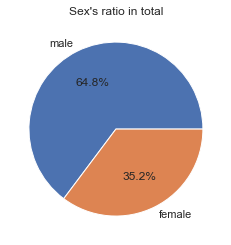

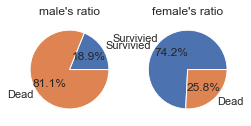

In [10]:
pie_chart("Sex")

- 남성 탑승객이 여성 탑승객보다 많다.

- 여성 탑승객의 생존 비율이 남성 탑승객보다 높다.

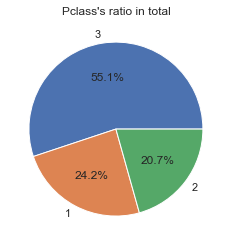

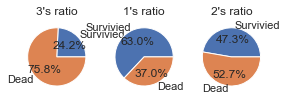

In [11]:
pie_chart("Pclass")

- 1등실 2등실 3등실 순으로 생존 비율이 높다.

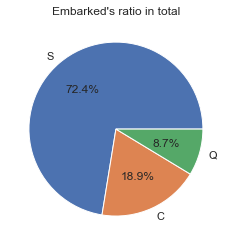

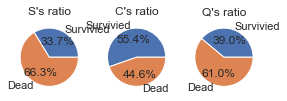

In [12]:
pie_chart("Embarked")

# Stage 3

In [13]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

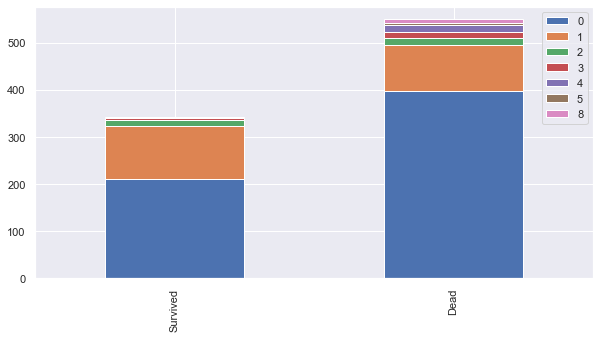

In [14]:
bar_chart("SibSp")

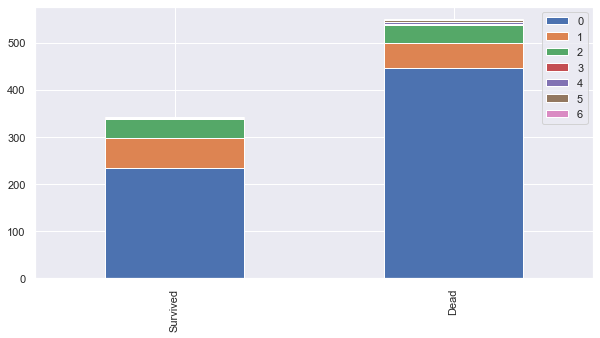

In [15]:
bar_chart("Parch")

# Data Preprocessing

In [16]:
train_and_test = [train, test]

## Name Feature

In [17]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr',
                                                 'Jonkheer','Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

In [21]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Other,3,20


In [22]:
train[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Other,0.347826


In [23]:
train[['Title', 'Survived']].groupby('Title', as_index = False).mean() 

# as_index = True이면 Title이 index로 작용한다.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [24]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

## Sex Feature

In [25]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

## Embarked Feature

In [26]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [27]:
for dataset in train_and_test:
    train.Embarked.fillna(value = 'S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

## Age Feature
> Binning

In [28]:
train.Age.isna().sum()

177

In [29]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [30]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
    dataset['Age'] = dataset['Age'].map( { 0:'Child', 1:'Young', 2:'Middle', 3:'Prime', 4:'Old' } ).astype(str)

## Fare Feature

In [31]:
for dataset in train_and_test:
    print(dataset['Fare'].isna().sum())

0
1


In [32]:
train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [33]:
test[test['Fare'].isna()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [34]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675) # Pclass가 3인 승객의 평균 Fare

In [35]:
train['FareBand'] = pd.qcut(train['Fare'], 5)

for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    
    dataset['Fare'] = dataset['Fare'].map( { 0:'XS', 1:'S', 2:'M', 3:'L', 4:'XL' } ).astype(str)

## SibSp & Parch Feature (Family)

In [36]:
for dataset in train_and_test:
    dataset['Family'] = dataset['Parch'] + dataset['SibSp']
    dataset['Family'] = dataset['Family'].astype(int)

## Other Feature

In [37]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop, axis = 1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis = 1)

In [38]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,male,Young,XS,S,Mr,1
1,1,1,female,Middle,XL,C,Mrs,1
2,1,3,female,Young,S,S,Miss,0
3,1,1,female,Middle,XL,S,Mrs,1
4,0,3,male,Middle,S,S,Mr,0


In [39]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,892,3,male,Middle,XS,Q,Mr,0
1,893,3,female,Middle,XS,S,Mrs,1
2,894,2,male,Prime,S,Q,Mr,0
3,895,3,male,Young,S,S,Mr,0
4,896,3,female,Young,M,S,Mrs,2


In [45]:
# One-hot-encoding for categorical variables

train = pd.get_dummies(train)
test = pd.get_dummies(test)
train_label = train['Survived']
train_data = train.drop('Survived', axis = 1)
test_data = test.drop('PassengerId', axis = 1).copy()

In [46]:
train

,Survived,Pclass,Family,Sex_female,Sex_male,Age_Child,Age_Middle,Age_Old,Age_Prime,Age_Young,...,Fare_XS,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,1,1,1,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,3,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,1,1,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,3,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
887,1,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
888,0,3,3,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
889,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [47]:
test

,PassengerId,Pclass,Family,Sex_female,Sex_male,Age_Child,Age_Middle,Age_Old,Age_Prime,Age_Young,...,Fare_XL,Fare_XS,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,893,3,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,894,2,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,895,3,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,896,3,2,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
414,1306,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
415,1307,3,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
416,1308,3,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


# Learning

## import

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

ModuleNotFoundError: No module named 'sklearn'